
Demo to Raghu

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float64) / 255.0  
y = mnist.target.astype(int)

idx = np.random.choice(len(X), 1500, replace=False)
X_sample = X.iloc[idx]
y_sample = y.iloc[idx]

In [22]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_sample)

In [23]:
from sklearn.decomposition import PCA

# PCA with top 3 components
pca_top3 = PCA(n_components=3)
X_pca_top3 = pca_top3.fit_transform(X_sample)

/var/folders/5n/z64_841d7zn4lzhk5r1t4m700000gn/T/ipykernel_17889/2465763219.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


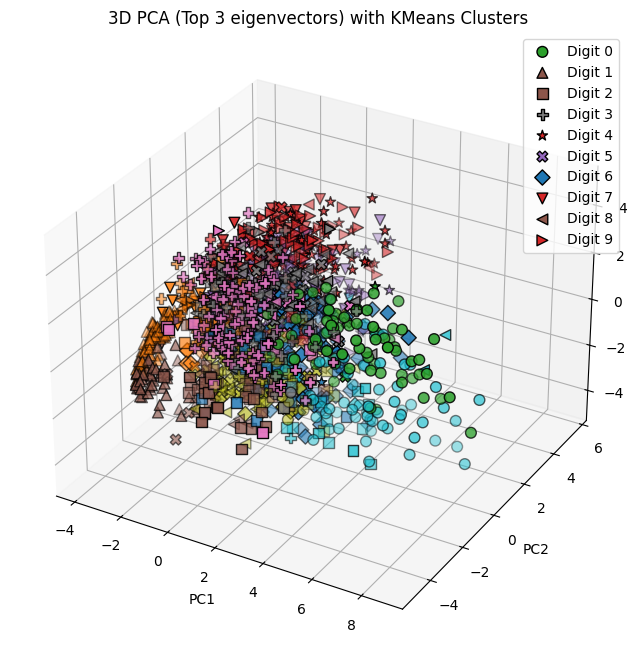

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>']

colors = plt.cm.get_cmap('tab10', n_clusters)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for digit in np.unique(y_sample):
    ix = np.where(y_sample == digit)
    ax.scatter(X_pca_top3[ix, 0], X_pca_top3[ix, 1], X_pca_top3[ix, 2],
               marker=markers[digit % len(markers)],
               c=np.array([colors(cluster_labels[i]) for i in ix[0]]),
               label=f'Digit {digit}', edgecolor='k', s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title("3D PCA (Top 3 eigenvectors) with KMeans Clusters")
plt.show()

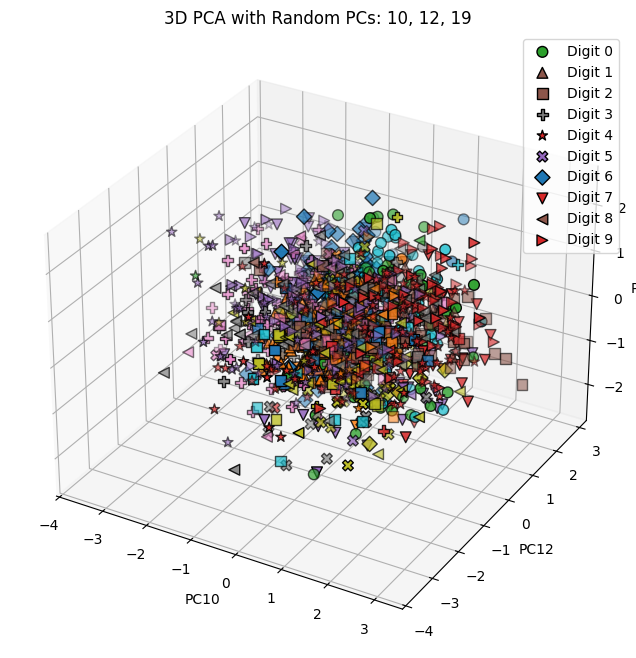

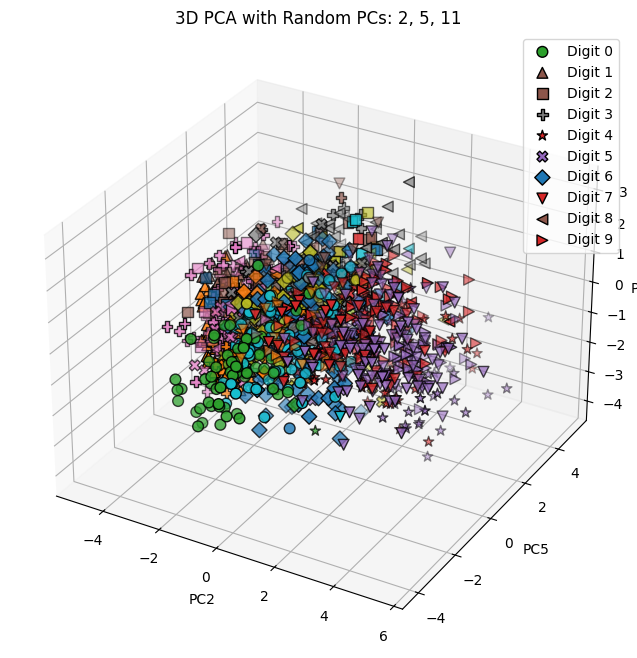

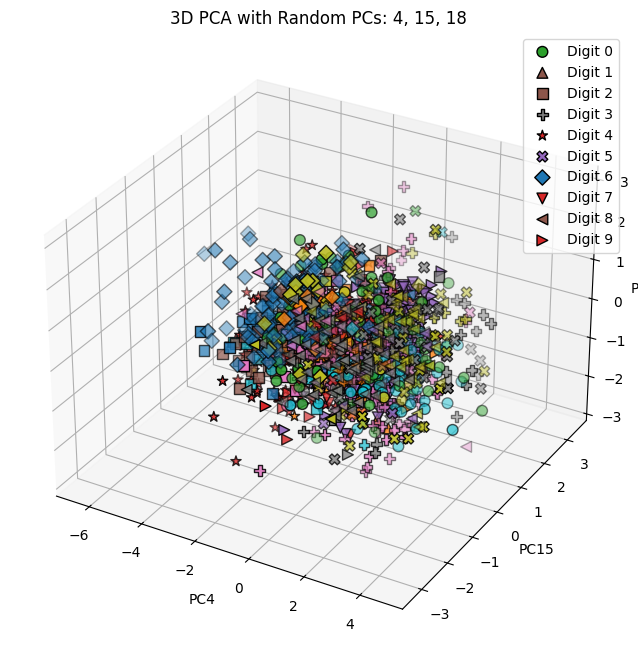

In [ ]:
# PCA with top 20 components
pca_top20 = PCA(n_components=20)
X_pca_top20 = pca_top20.fit_transform(X_sample)

import random

num_trials = 3  

for trial in range(num_trials):
    
    indices = sorted(random.sample(range(20), 3))
    X_random3 = X_pca_top20[:, indices]
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    
    for digit in np.unique(y_sample):
        ix = np.where(y_sample == digit)
        ax.scatter(X_random3[ix, 0], X_random3[ix, 1], X_random3[ix, 2],
                   marker=markers[digit % len(markers)],
                   c=np.array([colors(cluster_labels[i]) for i in ix[0]]),
                   label=f'Digit {digit}', edgecolor='k', s=60)
    
    ax.set_xlabel(f'PC{indices[0]+1}')
    ax.set_ylabel(f'PC{indices[1]+1}')
    ax.set_zlabel(f'PC{indices[2]+1}')
    ax.legend()
    plt.title(f"3D PCA with Random PCs: {indices[0]+1}, {indices[1]+1}, {indices[2]+1}")
    plt.show()